La empresa A&A Ltda, empieza un proceso de implementación de Machine Learning, usted ha sido designado para una de las tareas más importante dentro del proyecto, el cual consisten en realizar el análisis exploratorio de los datos y documentar los resultados encontrados, generando un informe que involucre los procedimientos y los resultados. 
El archivo que se analizara corresponde a precios de viviendas y locales para la venta y la colección de datos cuenta con variables que se ven involucradas en ese valor.


¿Qué tan significativo fue el aumento de valor en finca raíz en las ciudades del país?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Leer archivo

data = pd.read_csv('Untitled Folder 4/Data_Caso_Propuesto.csv')
print(data)

     Codigo    Ciudad     Departamento             Barrio  \
0     17180    BOGOTA     CUNDINAMARCA                NaN   
1     19292    BOGOTA     CUNDINAMARCA                NaN   
2     19292    BOGOTA     CUNDINAMARCA                NaN   
3      2575  SOGAMOSO           BOYACÁ             CENTRO   
4     11409      BUGA  VALLE DEL CAUCA  VEREDA CHAMBIMBAL   
..      ...       ...              ...                ...   
458   12709      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
459   17992    BOGOTA     CUNDINAMARCA                NaN   
460   12708      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
461   12706      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
462   12707      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   

                                             Direccion  Area Terreno  \
0                            AV CR 7 NO. 166 - 51 LT B          0.00   
1                                    CL 72 No. 12 - 77          0.00   
2                                    CL 72 No. 12 -

In [4]:
#Información de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 43.5+ KB


In [5]:
#Total de registros
len(data)

463

In [6]:
#Total columnas 
len(data.columns)

12

In [7]:
#Obtener estadísticas descriptivas para todas las columnas
data.describe()

,Codigo,Area Terreno,Area Construida,Precio
count,463.000000,4.630000e+02,463.000000,4.630000e+02
mean,18003.151188,1.515204e+04,87.517279,6.672032e+08
std,1992.191499,1.827101e+05,1137.469077,3.272992e+09
min,2575.000000,0.000000e+00,0.000000,4.650000e+06
25%,18184.500000,0.000000e+00,0.000000,1.230500e+07
50%,18332.000000,0.000000e+00,0.000000,1.587000e+07
75%,18539.500000,0.000000e+00,0.000000,1.379955e+08
max,19344.000000,3.217197e+06,22724.000000,4.523379e+10


In [8]:
#Columnas categóricas y numéricas
data.dtypes

Codigo                      int64
Ciudad                     object
Departamento               object
Barrio                     object
Direccion                  object
Area Terreno              float64
Area Construida           float64
Detalle Disponibilidad     object
Estrato                    object
Precio                    float64
Tipo de Inmueble           object
Datos Adicionales          object
dtype: object

In [9]:
# Filtrar columnas categóricas y numéricas
info_columnas = data.dtypes

columnas_categoricas = info_columnas[info_columnas == 'object'].index
columnas_numericas = info_columnas[info_columnas != 'object'].index

In [10]:
#Nulos
data.isnull().sum()

Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    423
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         345
dtype: int64

In [12]:
# Verificar si hay valores duplicados en el DataFrame
duplicados = data.duplicated()

# Mostrar las filas que tienen duplicados
filas_duplicadas = data[duplicados]

print("Existen duplicados: ",duplicados.any())
print(filas_duplicadas)

Existen duplicados:  False
Empty DataFrame
Columns: [Codigo, Ciudad, Departamento, Barrio, Direccion, Area Terreno, Area Construida, Detalle Disponibilidad, Estrato, Precio, Tipo de Inmueble, Datos Adicionales]
Index: []


In [14]:
#columnas con valores erróneos

nulos = data.columns[data.isnull().any()]

print(nulos)

Index(['Barrio', 'Datos Adicionales'], dtype='object')


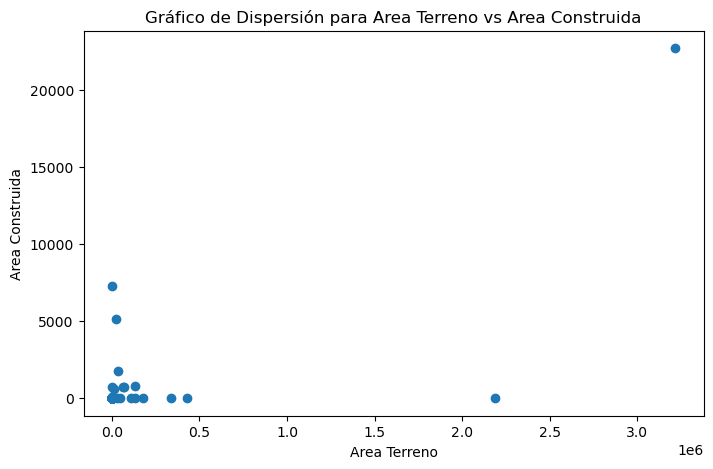

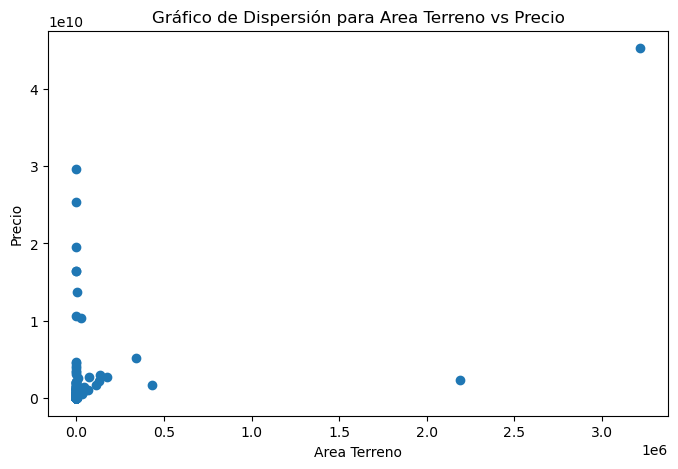

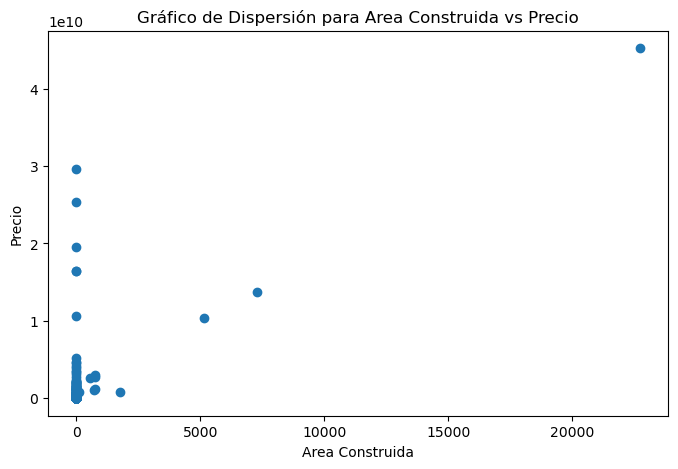

In [13]:
#Identificar valores atípicos

# Crear un scatter plot para cada par de columnas numéricas
columnas_numericas = data.select_dtypes(include=['float64']).columns
combinaciones_columnas = [(col1, col2) for i, col1 in enumerate(columnas_numericas) for col2 in columnas_numericas[i + 1:]]

for col1, col2 in combinaciones_columnas:
    plt.figure(figsize=(8, 5))
    plt.scatter(data[col1], data[col2])
    plt.title(f'Gráfico de Dispersión para {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

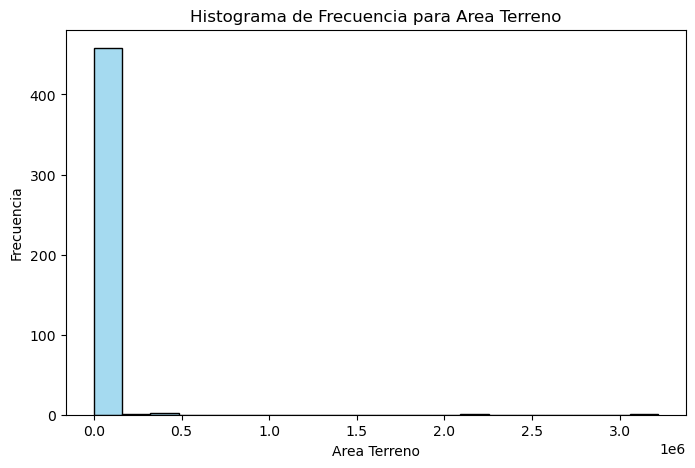

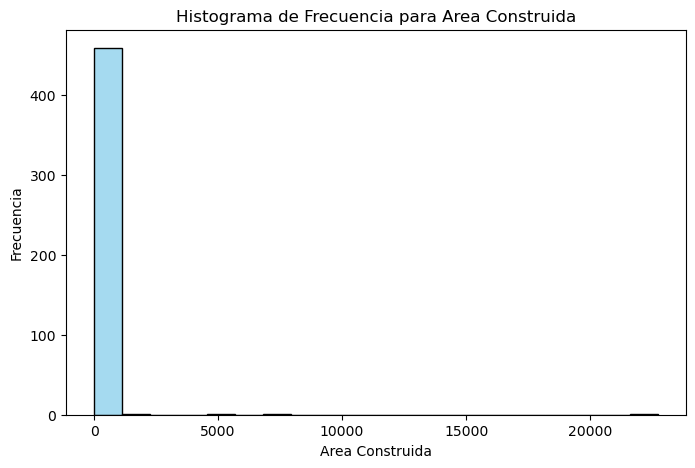

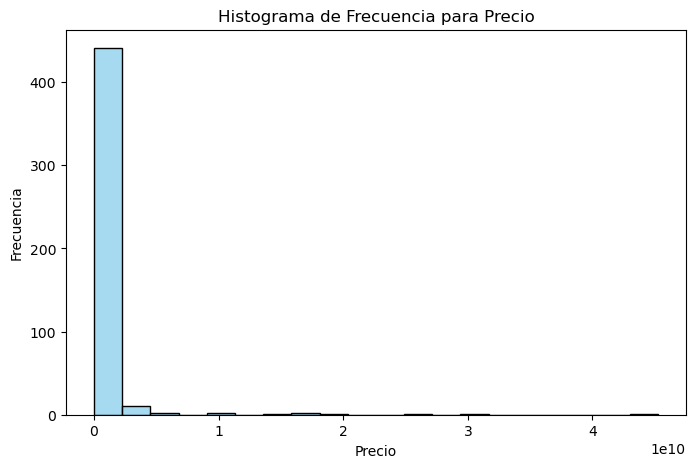

In [45]:
#Histograma
# Seleccionar columnas numéricas
columnas_numericas = data.select_dtypes(include=['float64']).columns

# Crear histogramas para cada columna numérica
for columna in columnas_numericas:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[columna], bins=20, kde=False, color='skyblue')
    plt.title(f'Histograma de Frecuencia para {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

In [52]:
#Elimina duplicados y nulos

data_sin_duplicados = data.drop_duplicates()

#Eliminar filas con valores nulos

data_sin_nulos_filas = data.dropna()

#Eliminar columnas con valores nulos

data_sin_nulos_columnas = data.dropna(axis=1)

print(data_sin_duplicados)
print(data_sin_nulos_filas)
print(data_sin_nulos_columnas)


     Codigo    Ciudad     Departamento             Barrio  \
0     17180    BOGOTA     CUNDINAMARCA                NaN   
1     19292    BOGOTA     CUNDINAMARCA                NaN   
2     19292    BOGOTA     CUNDINAMARCA                NaN   
3      2575  SOGAMOSO           BOYACÁ             CENTRO   
4     11409      BUGA  VALLE DEL CAUCA  VEREDA CHAMBIMBAL   
..      ...       ...              ...                ...   
458   12709      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
459   17992    BOGOTA     CUNDINAMARCA                NaN   
460   12708      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
461   12706      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
462   12707      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   

                                             Direccion  Area Terreno  \
0                            AV CR 7 NO. 166 - 51 LT B          0.00   
1                                    CL 72 No. 12 - 77          0.00   
2                                    CL 72 No. 12 -

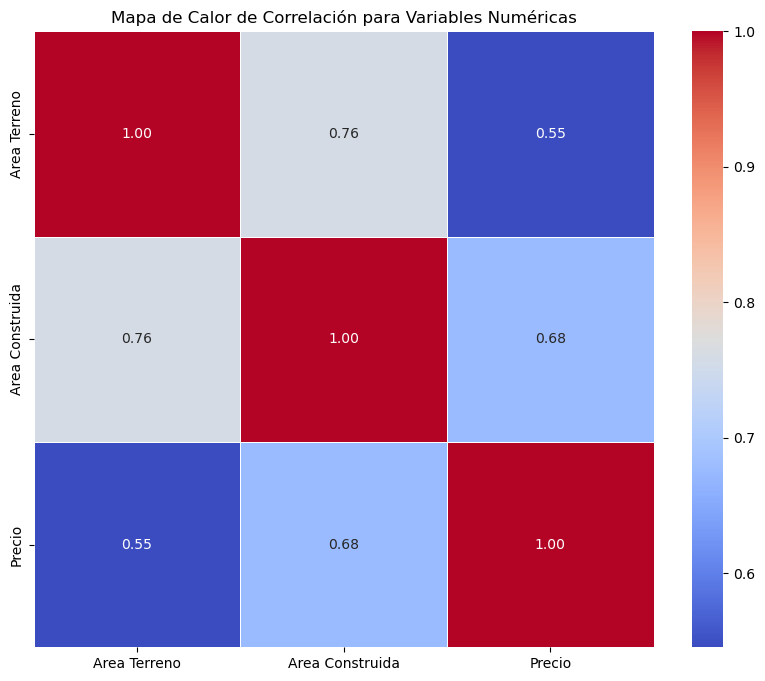

In [58]:
#Matriz de correlación

# Seleccionar solo columnas numéricas
data_numericas = data.select_dtypes(include=['float64'])

# Calcular la matriz de correlación
matriz_correlacion = data_numericas.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación para Variables Numéricas')
plt.show()

In [61]:
#Agrupación de Columnas

# Agrupar columnas relacionadas al área
data['Area_Total'] = data['Area Terreno'] + data['Area Construida']

print(data)

     Codigo    Ciudad     Departamento             Barrio  \
0     17180    BOGOTA     CUNDINAMARCA                NaN   
1     19292    BOGOTA     CUNDINAMARCA                NaN   
2     19292    BOGOTA     CUNDINAMARCA                NaN   
3      2575  SOGAMOSO           BOYACÁ             CENTRO   
4     11409      BUGA  VALLE DEL CAUCA  VEREDA CHAMBIMBAL   
..      ...       ...              ...                ...   
458   12709      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
459   17992    BOGOTA     CUNDINAMARCA                NaN   
460   12708      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
461   12706      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
462   12707      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   

                                             Direccion  Area Terreno  \
0                            AV CR 7 NO. 166 - 51 LT B          0.00   
1                                    CL 72 No. 12 - 77          0.00   
2                                    CL 72 No. 12 -

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
 12  Area_Total              463 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 47.2+ KB


In [65]:
# Agrupar columnas relacionadas con el área
area_columns = ['Area Terreno', 'Area Construida', 'Area_Total']

In [68]:
# Crear una nueva columna 'Area_Total' sumando las áreas
data['Area_Total'] = data[area_columns].sum(axis=1)

print(data)

     Codigo    Ciudad     Departamento             Barrio  \
0     17180    BOGOTA     CUNDINAMARCA                NaN   
1     19292    BOGOTA     CUNDINAMARCA                NaN   
2     19292    BOGOTA     CUNDINAMARCA                NaN   
3      2575  SOGAMOSO           BOYACÁ             CENTRO   
4     11409      BUGA  VALLE DEL CAUCA  VEREDA CHAMBIMBAL   
..      ...       ...              ...                ...   
458   12709      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
459   17992    BOGOTA     CUNDINAMARCA                NaN   
460   12708      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
461   12706      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
462   12707      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   

                                             Direccion  Area Terreno  \
0                            AV CR 7 NO. 166 - 51 LT B          0.00   
1                                    CL 72 No. 12 - 77          0.00   
2                                    CL 72 No. 12 -

In [71]:
# Crear una nueva columna que clasifique el estrato en rangos


# Convertir 'Estrato' a numérico y manejar casos no válidos
data['Estrato'] = pd.to_numeric(data['Estrato'], errors='coerce')

# Crear una nueva columna que clasifique el estrato en rangos

data['Estrato_Rango'] = pd.cut(data['Estrato'], bins=[0, 2, 4, 6, 10], labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

print(data)

     Codigo    Ciudad     Departamento             Barrio  \
0     17180    BOGOTA     CUNDINAMARCA                NaN   
1     19292    BOGOTA     CUNDINAMARCA                NaN   
2     19292    BOGOTA     CUNDINAMARCA                NaN   
3      2575  SOGAMOSO           BOYACÁ             CENTRO   
4     11409      BUGA  VALLE DEL CAUCA  VEREDA CHAMBIMBAL   
..      ...       ...              ...                ...   
458   12709      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
459   17992    BOGOTA     CUNDINAMARCA                NaN   
460   12708      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
461   12706      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   
462   12707      CALI  VALLE DEL CAUCA   PRADOS DEL NORTE   

                                             Direccion  Area Terreno  \
0                            AV CR 7 NO. 166 - 51 LT B          0.00   
1                                    CL 72 No. 12 - 77          0.00   
2                                    CL 72 No. 12 -